In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError,ResidualsPlot

sns.set_style("whitegrid")
sns.set_palette('Set2')

In [4]:
df=pd.read_csv('data\\WildBlueberryPollinationSimulationData.csv')
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [5]:
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [4]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


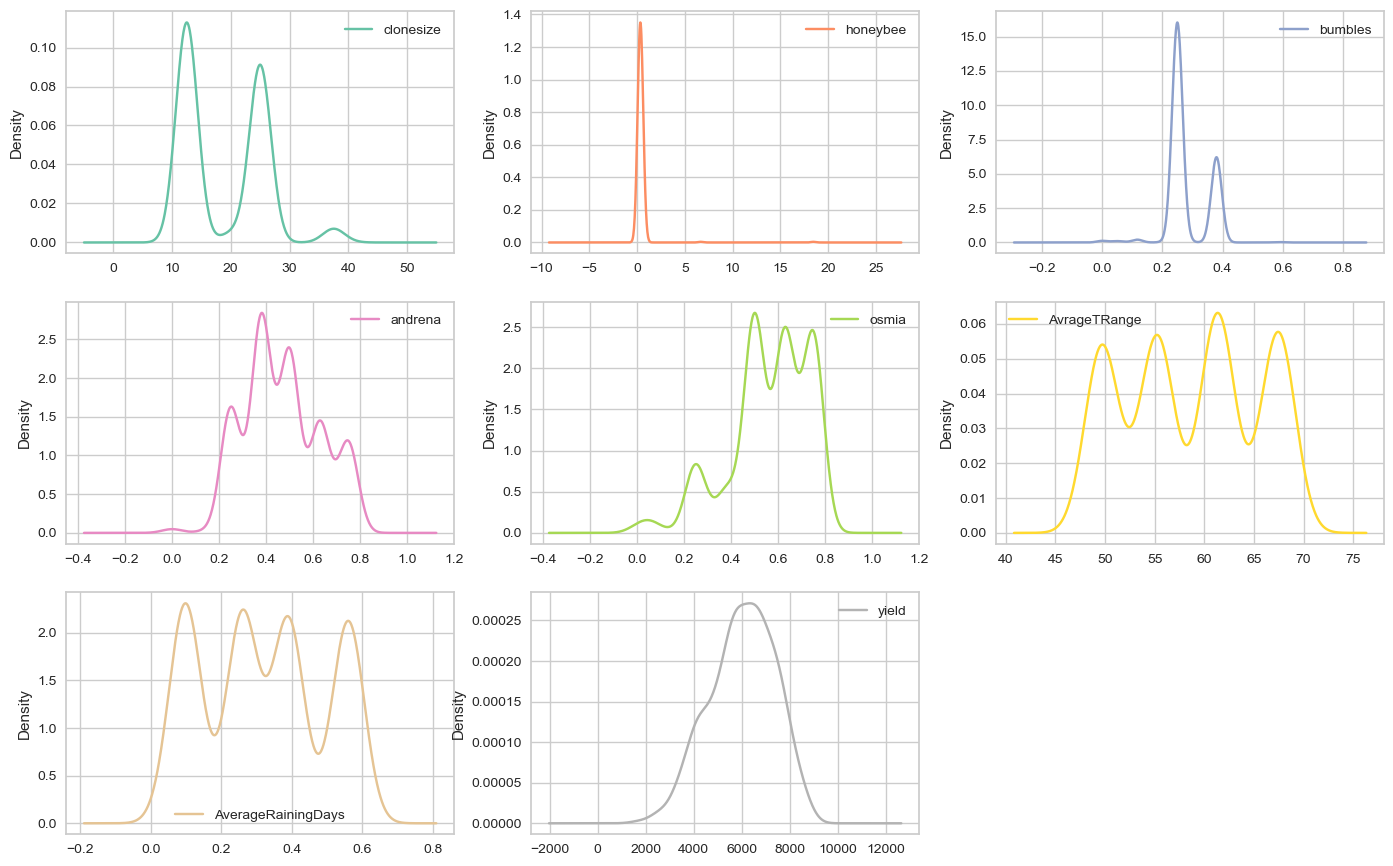

In [176]:
df.plot(kind="kde", 
        subplots=True, 
        layout = (6,3), 
        figsize=(17,22), 
        sharex=False, 
        sharey=False);

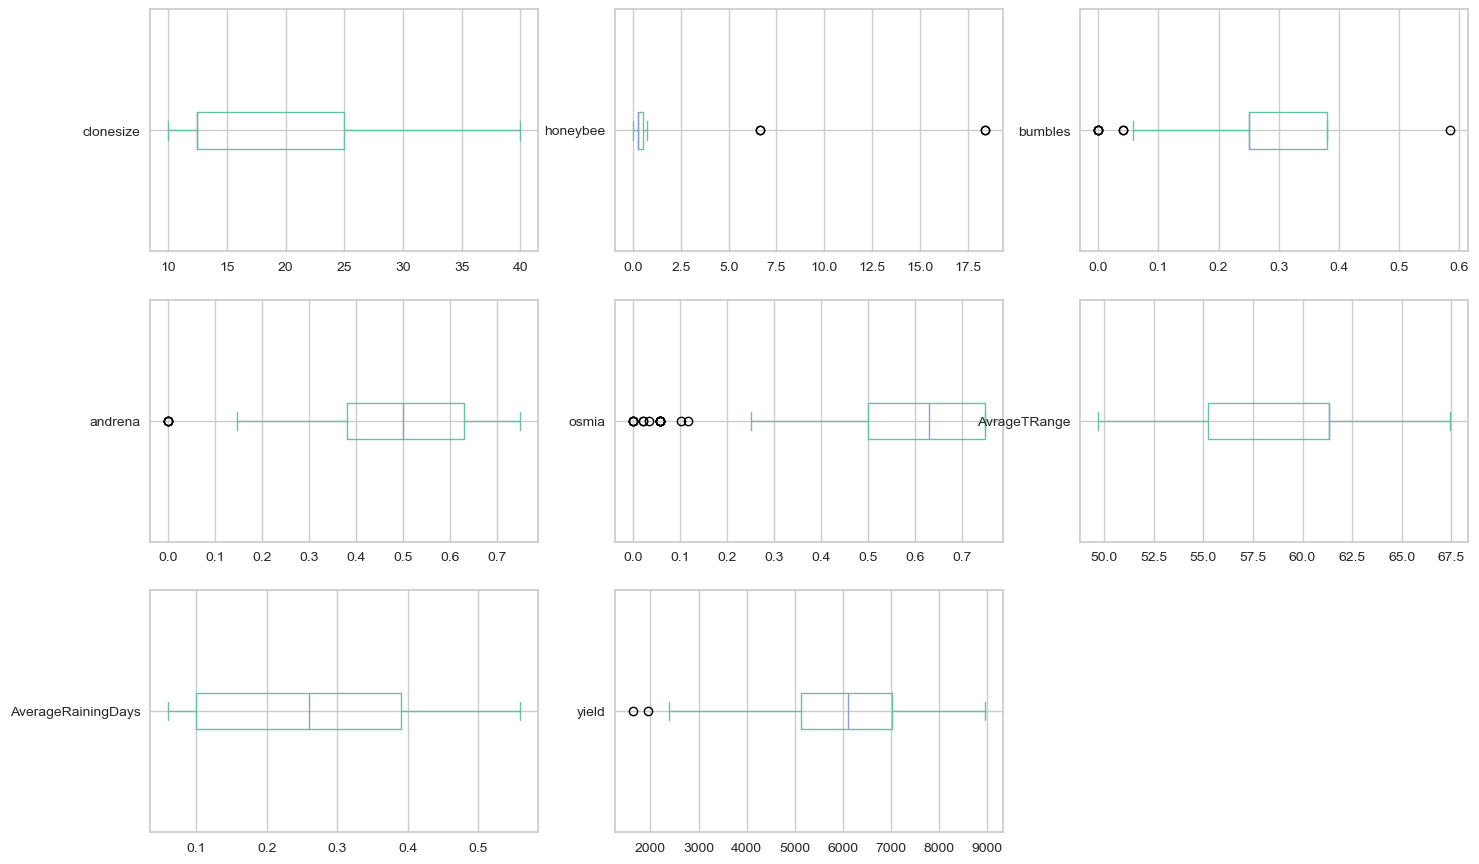

In [164]:
df.plot(kind="box", 
        vert=False, # makes horizontal plots instead of vertical
        subplots=True, 
        layout = (6,3), 
        figsize=(17,22), 
        sharex=False, 
        sharey=False);

<AxesSubplot:>

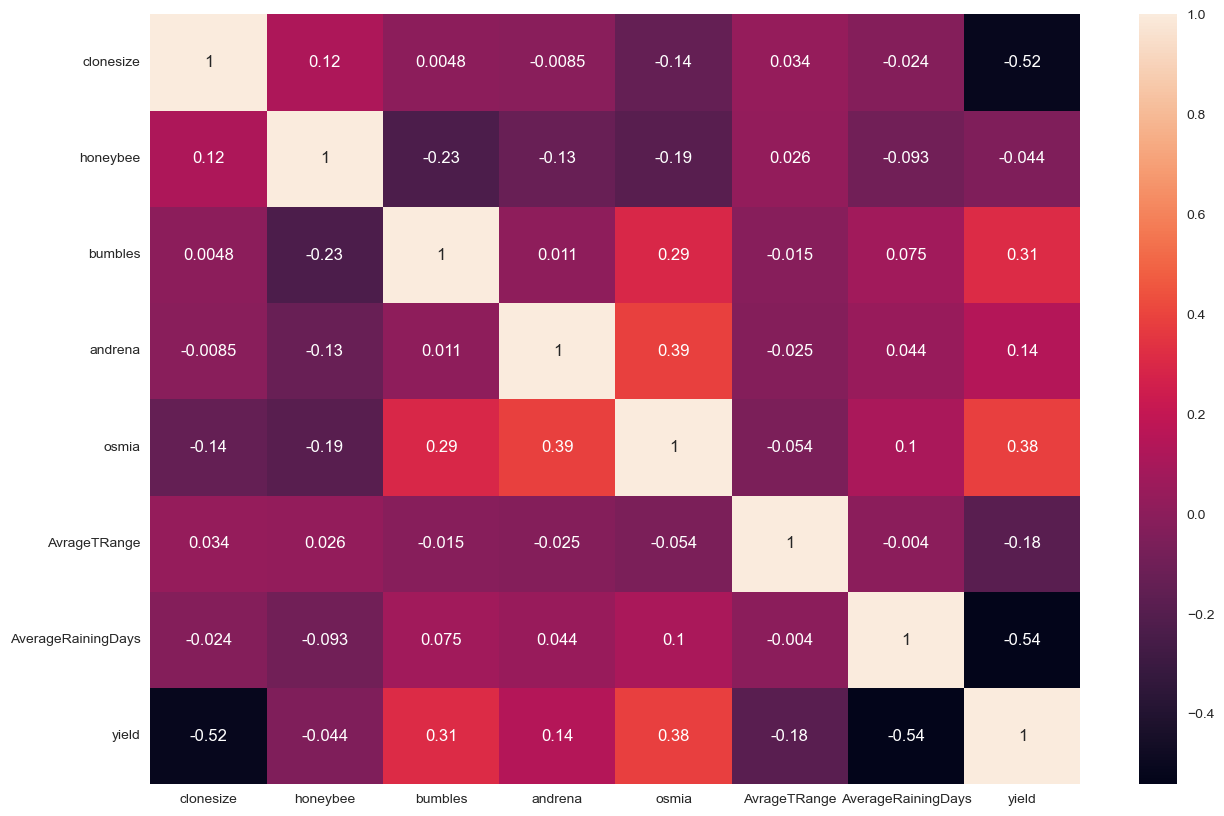

In [165]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Preprocess

In [9]:
df['AvrageTRange']=(df['AverageOfUpperTRange']+df['AverageOfLowerTRange'])/2

In [8]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [10]:
col=['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AvrageTRange', 
     'AverageRainingDays', 'yield']

In [13]:
df=df[col]
X=df.drop(['yield'],axis=1)

In [14]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

clonesize             12.50
honeybee               0.25
bumbles                0.13
andrena                0.25
osmia                  0.25
AvrageTRange           6.10
AverageRainingDays     0.29
dtype: float64


In [15]:
bbry_data_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
bbry_data_iqr.shape

C:\Users\Acer\AppData\Local\Temp\ipykernel_4868\2313031275.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bbry_data_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(759, 8)

In [16]:
bbry_data_iqr

,clonesize,honeybee,bumbles,andrena,osmia,AvrageTRange,AverageRainingDays,yield
0,37.5,0.75,0.25,0.25,0.25,61.35,0.26,3813.165795
1,37.5,0.75,0.25,0.25,0.25,61.35,0.10,4947.605663
2,37.5,0.75,0.25,0.25,0.25,67.45,0.26,3866.798965
3,37.5,0.75,0.25,0.25,0.25,67.45,0.10,4303.943030
4,37.5,0.75,0.25,0.25,0.25,61.35,0.39,3436.493543
...,...,...,...,...,...,...,...,...
754,25.0,0.50,0.38,0.63,0.50,55.25,0.10,7184.013843
755,25.0,0.50,0.38,0.63,0.50,49.70,0.26,6292.960756
756,25.0,0.50,0.38,0.63,0.50,49.70,0.10,6374.444297
757,25.0,0.50,0.38,0.63,0.50,55.25,0.39,6180.951419


Using the boxplot function without specifying `order` is likely to produce an incorrect plot.


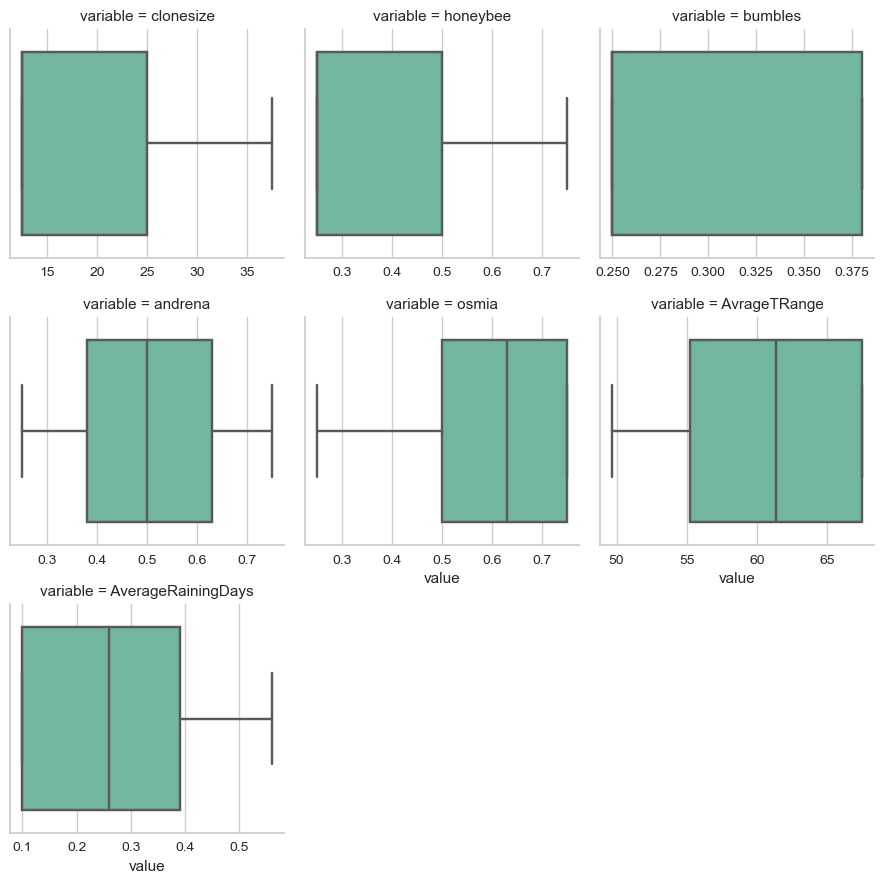

In [166]:
unpivot = pd.melt(bbry_data_iqr, bbry_data_iqr.describe().columns[-1], bbry_data_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [18]:
from scipy import stats

In [19]:
z = np.abs(stats.zscore(df))
display(z)

,clonesize,honeybee,bumbles,andrena,osmia,AvrageTRange,AverageRainingDays,yield
0,2.678126,0.34026,0.488512,1.359549,1.846405,0.409910,0.350531,1.622087
1,2.678126,0.34026,0.488512,1.359549,1.846405,0.409910,1.285279,0.785530
2,2.678126,0.34026,0.488512,1.359549,1.846405,1.342248,0.350531,1.582537
3,2.678126,0.34026,0.488512,1.359549,1.846405,1.342248,1.285279,1.260179
4,2.678126,0.34026,0.488512,1.359549,1.846405,0.409910,0.408952,1.899853
...,...,...,...,...,...,...,...,...
772,1.253503,0.12253,2.494523,0.371655,2.982429,0.409910,1.518966,0.500689
773,3.035546,0.12253,2.494523,0.371655,2.982429,0.409910,1.518966,1.946352
774,0.176180,0.12253,2.494523,0.371655,2.982429,0.409910,0.408952,1.334596
775,0.176180,0.12253,2.494523,0.371655,2.982429,0.491859,1.518966,1.361680


In [20]:
bbry_data_zscore = df[(z < 3).all(axis=1)]
bbry_data_zscore.shape

(767, 8)

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.


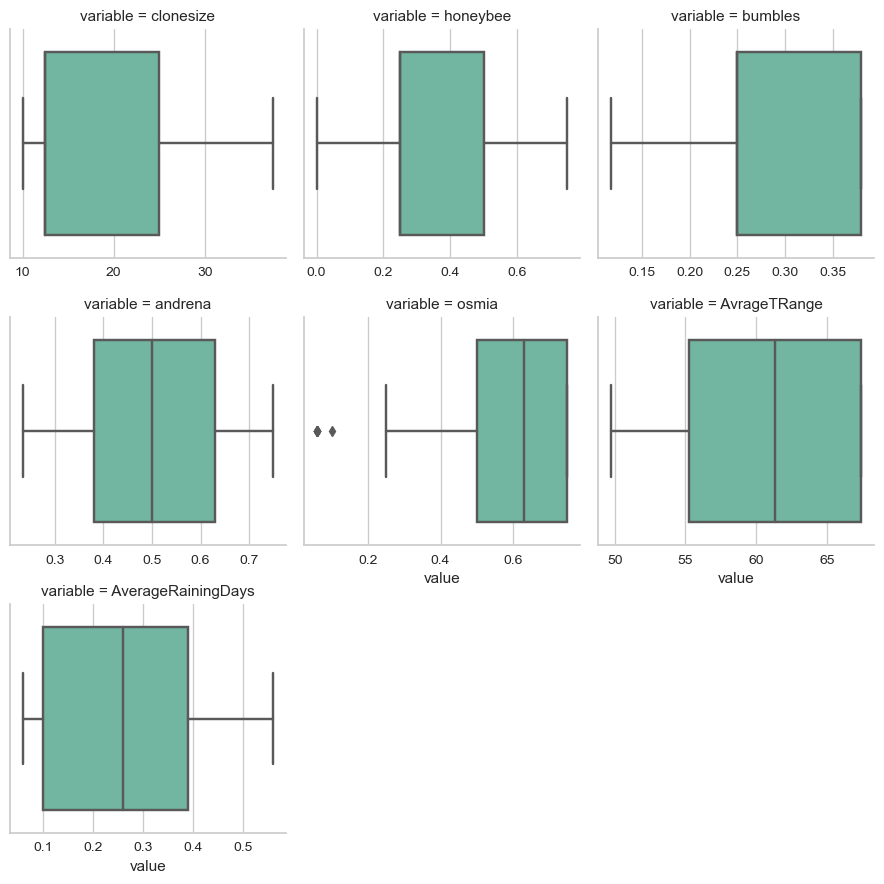

In [167]:
unpivot = pd.melt(bbry_data_zscore, bbry_data_zscore.columns[-1], bbry_data_zscore.columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")


plt.show()

In [23]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [24]:
X = df.drop(["yield"], axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

Feature clonesize: 184.510812
Feature honeybee: 56.025407
Feature bumbles: 56.110457
Feature andrena: 8.547399
Feature osmia: 115.949147
Feature AvrageTRange: 9.411758
Feature AverageRainingDays: 211.684877


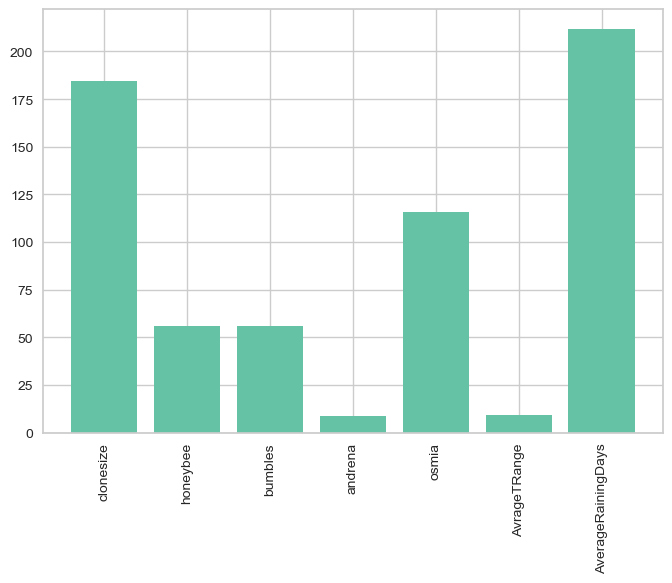

Feature clonesize: 0.135883
Feature honeybee: 0.099200
Feature bumbles: 0.072587
Feature andrena: 0.041588
Feature osmia: 0.112559
Feature AvrageTRange: 0.081225
Feature AverageRainingDays: 0.194871


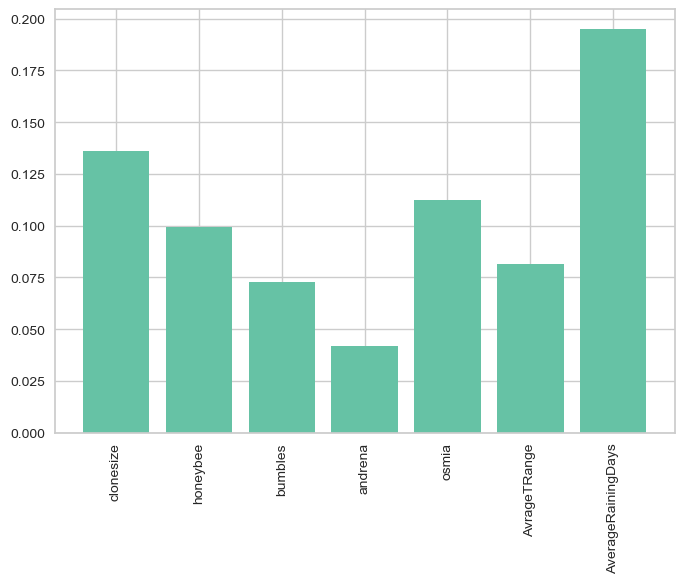

In [168]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

In [85]:
col=['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AvrageTRange', 'AverageRainingDays']

In [86]:
xTrain,xTest,yTrain,yTest=train_test_split(bbry_data_zscore[col],bbry_data_zscore['yield'],test_size=0.2,random_state=4)

In [162]:
models=[Lasso(),LinearRegression(),RandomForestRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor()]

for model in models:
    model.fit(X_train_fs_info,y_train)
    pred=model.predict(X_test_fs_info)
    print(f'Model: {model}\nr2 Score: {r2_score(y_test,pred)}')
    print()

Model: Lasso()
r2 Score: 0.6775181760244693

Model: LinearRegression()
r2 Score: 0.536968533629211

Model: RandomForestRegressor()
r2 Score: 0.8836979661208268

Model: ExtraTreesRegressor()
r2 Score: 0.8832441802188256

Model: GradientBoostingRegressor()
r2 Score: 0.870878426310748



In [106]:
import optuna
from sklearn.model_selection import KFold,cross_val_score

In [107]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def extra_tree_objective(trial, data=xTrain, target=yTrain):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = ExtraTreesRegressor(**param,n_jobs=-1)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [108]:
def tuner(objective, n=5, direction='maximize'): 
    # Create Study object
    study = optuna.create_study(direction="maximize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [122]:
%%time
rf_param, rf_score = tuner(extra_tree_objective,200)
rf_tuned_model_optuna = ExtraTreesRegressor(**rf_param,n_jobs=-1)

[I 2023-05-10 13:54:42,435] A new study created in memory with name: no-name-2802cf73-a74a-4bf0-a3d7-d361cefe44a8
[I 2023-05-10 13:54:45,953] Trial 0 finished with value: -400.13261243520884 and parameters: {'n_estimators': 369, 'max_depth': 19, 'min_samples_split': 7, 'max_features': 0.37180431565372446}. Best is trial 0 with value: -400.13261243520884.
[I 2023-05-10 13:54:47,600] Trial 1 finished with value: -380.74282533522853 and parameters: {'n_estimators': 144, 'max_depth': 18, 'min_samples_split': 2, 'max_features': 0.14059138565851434}. Best is trial 1 with value: -380.74282533522853.
[I 2023-05-10 13:54:51,901] Trial 2 finished with value: -440.21798834479296 and parameters: {'n_estimators': 450, 'max_depth': 12, 'min_samples_split': 5, 'max_features': 0.12670256959186943}. Best is trial 1 with value: -380.74282533522853.
[I 2023-05-10 13:54:53,557] Trial 3 finished with value: -454.7421486714399 and parameters: {'n_estimators': 155, 'max_depth': 13, 'min_samples_split': 6, 'm

Best score: -281.72386302331205
Optimized parameters: {'n_estimators': 284, 'max_depth': 13, 'min_samples_split': 2, 'max_features': 0.8138576116208689}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
Wall time: 9min 58s


In [123]:
rf_param

{'n_estimators': 284,
 'max_depth': 13,
 'min_samples_split': 2,
 'max_features': 0.8138576116208689}

In [124]:
rf_tuned_model_optuna.fit(xTrain,yTrain)
pred=rf_tuned_model_optuna.predict(xTest)
r2_score(yTest,pred)

0.9729069961301718

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


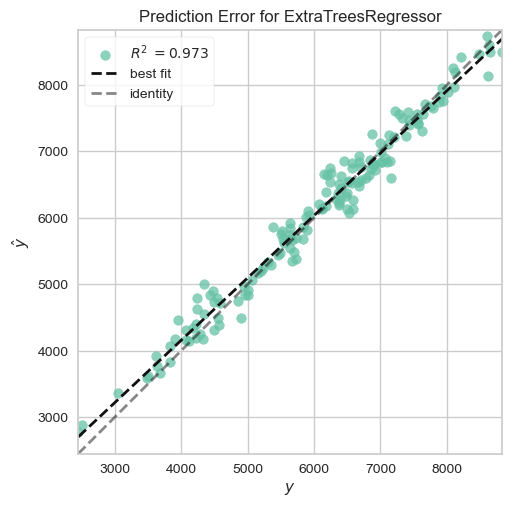

In [169]:
visualizer = PredictionError(rf_tuned_model_optuna)
visualizer.fit(xTrain, yTrain)
visualizer.score(xTest, yTest)
visualizer.show()
plt.show()

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


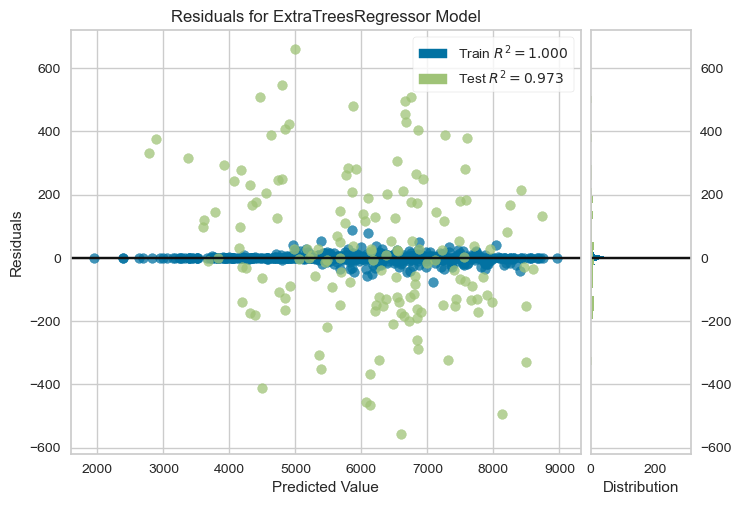

In [170]:
visualizer = ResidualsPlot(rf_tuned_model_optuna)
visualizer.fit(xTrain, yTrain)
visualizer.score(xTest, yTest)
visualizer.show()
plt.show()

In [136]:
import shap

In [137]:
size = 10

sample_exists = False

if sample_exists:
    sample_set = pd.read_csv('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P1\\shap_values_sample1000.pkl')
else:
    sample_set = xTest.sample(size)

In [138]:
is_saved = False

if is_saved:
    with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P1\\shap_values_sample1000.pkl', 'rb') as f:
        shap_values_ = joblib.load(f)
else:
    sv = shap.TreeExplainer(rf_tuned_model_optuna)(sample_set)

In [140]:
shap.initjs()

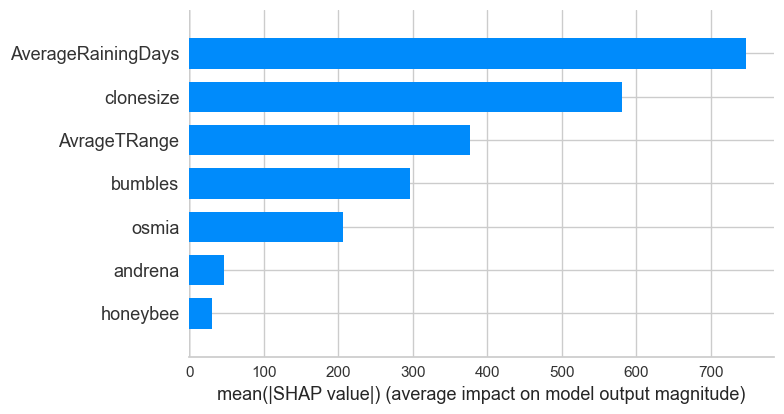

In [173]:
shap.summary_plot(sv.values, sample_set, plot_type="bar")

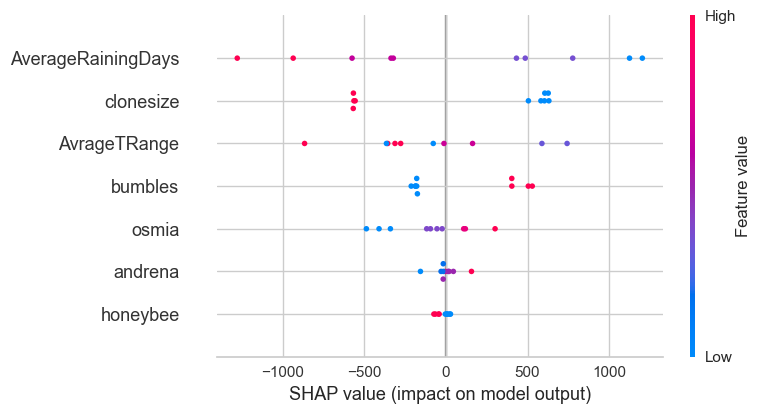

In [143]:
shap.summary_plot(sv.values, sample_set)

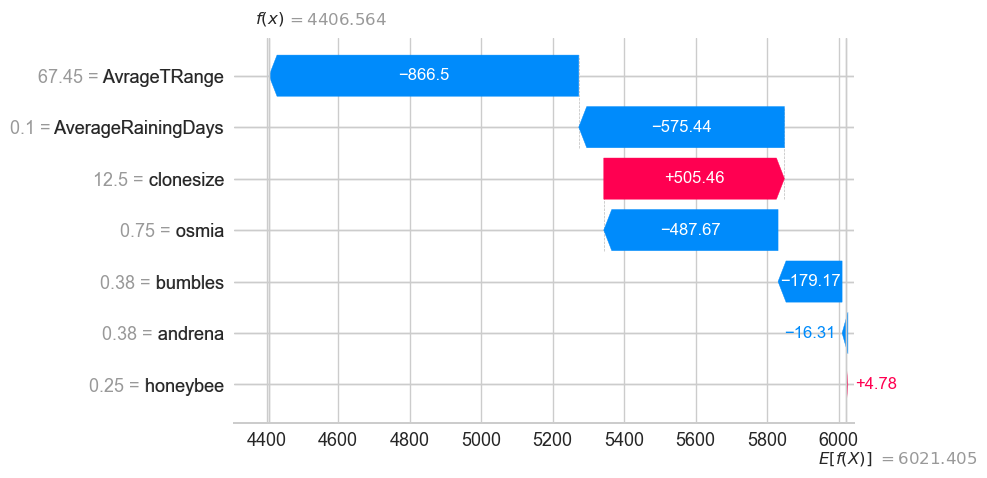

In [146]:
# sv = shap.TreeExplainer(rf_tuned_model_optuna)(sample_set)
exp = shap.Explanation(sv.values, 
                  sv.base_values[1], 
                  data=xTest.values, 
                  feature_names=xTest.columns)
idx = 0
shap.plots.waterfall(exp[idx])

In [149]:
shap.force_plot(shap.TreeExplainer(rf_tuned_model_optuna).expected_value, sv.values, sample_set)

In [159]:
# for single tuple
shap.force_plot(shap.TreeExplainer(rf_tuned_model_optuna).expected_value, sv.values[0], sample_set.values[0])

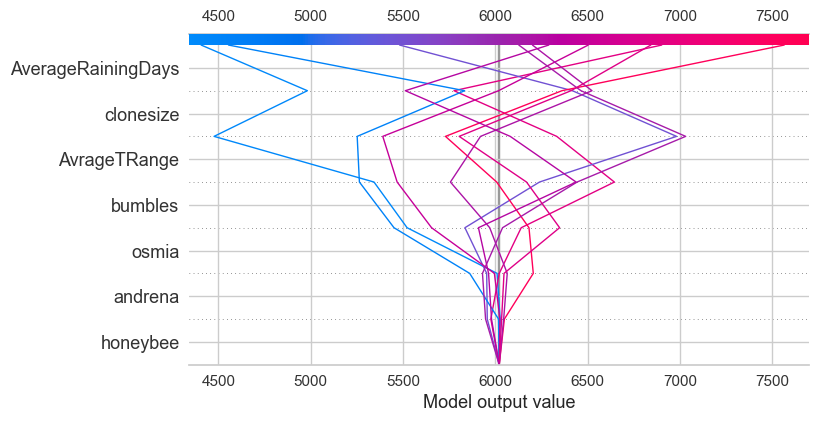

In [150]:
shap.decision_plot(shap.TreeExplainer(rf_tuned_model_optuna).expected_value[0], sv.values, sample_set.columns)

In [160]:
import joblib
##Saving model
with open('F:\\1.Study Materials\\kaggel\\TMC MegaGP\\P3\\model.pkl','wb') as f:
    joblib.dump(rf_tuned_model_optuna,f)

In [200]:
rf_tuned_model_optuna.predict(np.array([[12.5 ,  0.25,  0.38,  0.38,  0.75, 67.45,  0.1 ]]))[0]

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


8738.318137852084

In [192]:
xTest.iloc[0].values

array([12.5 ,  0.25,  0.38,  0.38,  0.75, 67.45,  0.1 ])

In [189]:
xTest['AverageRainingDays'].describe()

count    154.000000
mean       0.314610
std        0.172267
min        0.060000
25%        0.100000
50%        0.260000
75%        0.390000
max        0.560000
Name: AverageRainingDays, dtype: float64